<a href="https://colab.research.google.com/github/Atiya-Khan16/Diabetes-prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
uploaded= files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Removeing unrealistic ages (keeping ages 1 and above)
df = df[df['age'] >= 1]
print(df['age'].describe())


count    99089.000000
mean        42.266093
std         22.266528
min          1.000000
25%         24.000000
50%         43.000000
75%         60.000000
max         80.000000
Name: age, dtype: float64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,True
99996,False
99997,False
99998,False


In [ ]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
# Print new column names
df.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.694656,0,1,-0.337528,0.999676,0.046494,0,False,False,False,False,False,True,False
1,0.526978,0,0,-0.014126,0.999676,-1.425480,0,False,False,False,False,False,False,False
2,-0.640700,0,0,-0.014126,0.159541,0.488086,0,True,False,False,False,False,True,False
3,-0.281415,0,0,-0.601716,-0.493898,0.414487,0,False,False,True,False,False,False,False
4,1.515013,1,1,-1.104280,-0.680595,0.414487,0,True,False,True,False,False,False,False


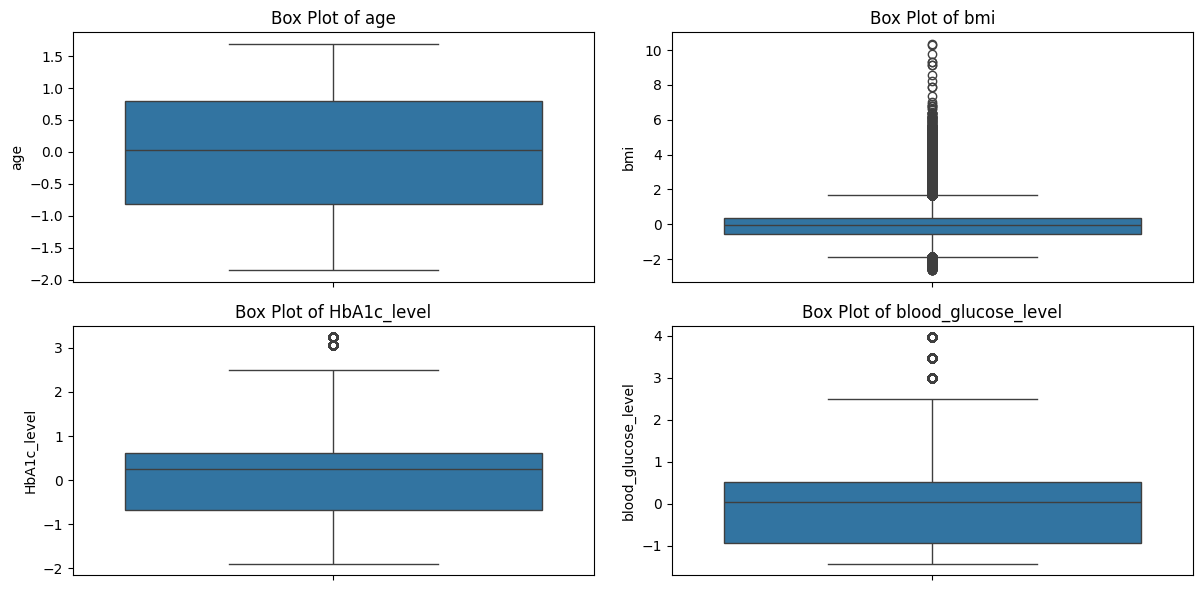

In [ ]:
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create box plots for each numeric column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Create subplots (2 rows, 2 columns)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply IQR filtering
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    df2 = remove_outliers(df, col)

# Check shape after removing outliers
print(df2.shape)


(97051, 14)


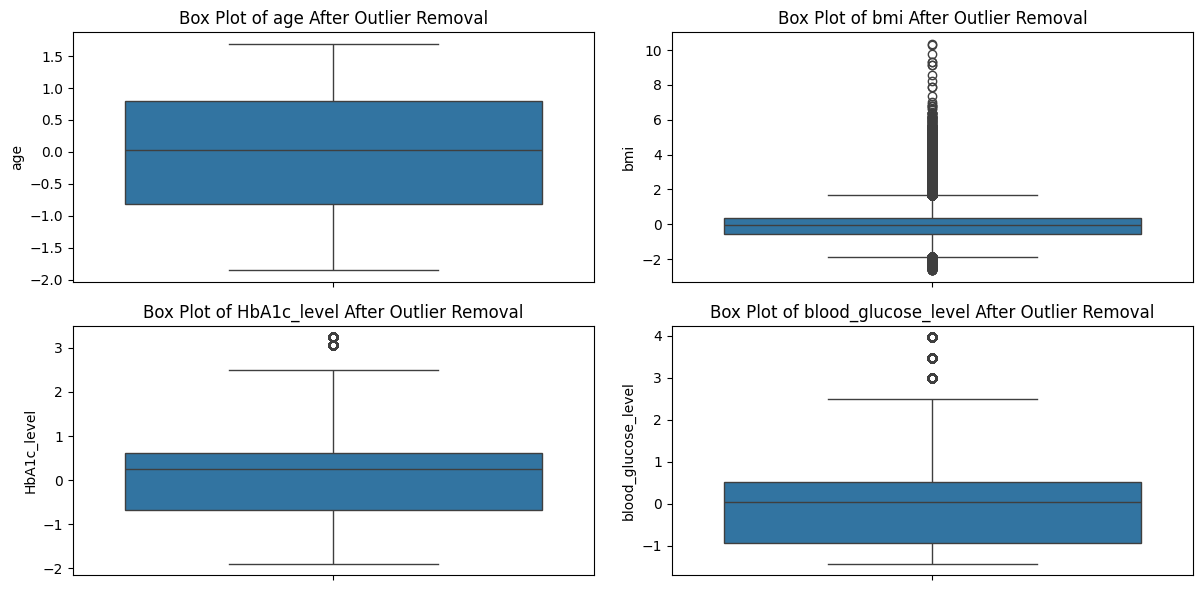

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} After Outlier Removal')
plt.tight_layout()
plt.show()


In [ ]:
print(f"Original dataset: 100000 rows")
print(f"After outlier removal: {df2.shape[0]} rows")
print(f"Rows removed: {100000 - df2.shape[0]}")


Original dataset: 100000 rows
After outlier removal: 97051 rows
Rows removed: 2949


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['diabetes'] = y_resampled

# Check class balance
print(df_resampled['diabetes'].value_counts())


diabetes
0    90589
1    90589
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df_resampled[numeric_columns] = scaler.fit_transform(df_resampled[numeric_columns])

df_resampled.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,1.379073,0,1,-0.587506,0.343167,-0.414432,False,False,False,False,False,True,False,0
1,0.148872,0,0,-0.294982,0.343167,-1.470951,False,False,False,False,False,False,False,0
2,-1.081328,0,0,-0.294982,-0.362601,-0.097476,True,False,False,False,False,True,False,0
3,-0.702805,0,0,-0.826469,-0.911531,-0.150302,False,False,True,False,False,False,False,0
4,1.189811,1,1,-1.281049,-1.068368,-0.150302,True,False,True,False,False,False,False,0


In [ ]:
df_resampled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,1.694656,0,1,-0.337528,0.999676,0.046494,False,False,False,False,False,True,False,0
1,0.526978,0,0,-0.014126,0.999676,-1.425480,False,False,False,False,False,False,False,0
2,-0.640700,0,0,-0.014126,0.159541,0.488086,True,False,False,False,False,True,False,0
3,-0.281415,0,0,-0.601716,-0.493898,0.414487,False,False,True,False,False,False,False,0
4,1.515013,1,1,-1.104280,-0.680595,0.414487,True,False,True,False,False,False,False,0


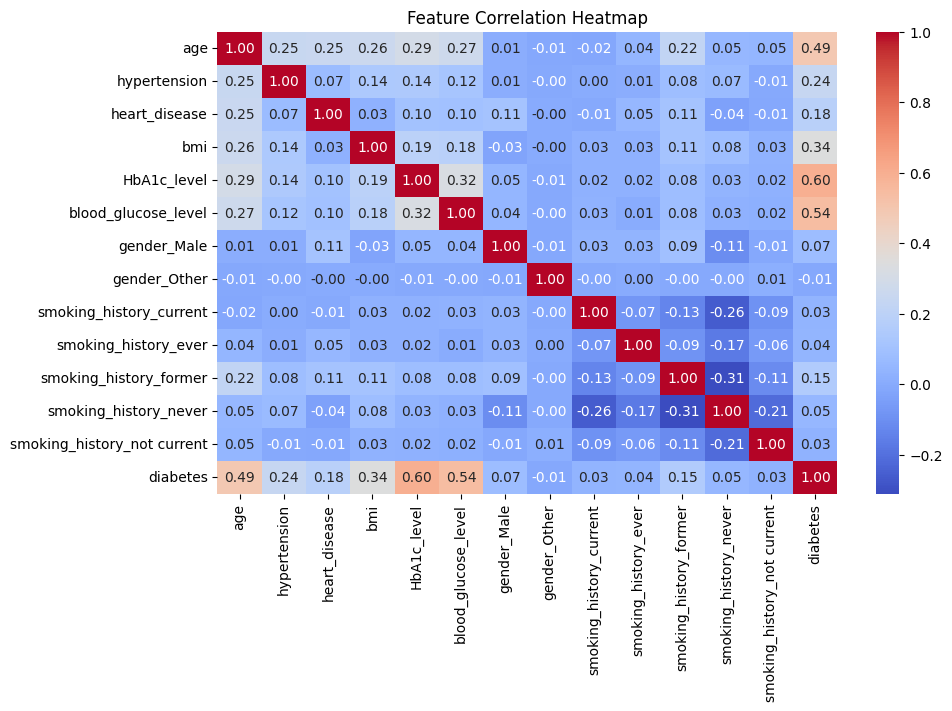

In [ ]:
# Compute the correlation matrix
corr_matrix = df_resampled.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Define features (X) and target (y)
X = df_resampled.drop(columns=['diabetes'])  # Drop target variable
y = df_resampled['diabetes']

# Apply SelectKBest to select the top 5 best features
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top selected features:", list(selected_features))


Top selected features: ['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']


Feature Importance based on Mutual Information:
 HbA1c_level                    0.500886
age                            0.487133
blood_glucose_level            0.451639
bmi                            0.391031
hypertension                   0.031748
heart_disease                  0.019068
gender_Male                    0.014721
smoking_history_former         0.013991
smoking_history_never          0.011595
smoking_history_ever           0.000770
gender_Other                   0.000753
smoking_history_current        0.000268
smoking_history_not current    0.000000
dtype: float64


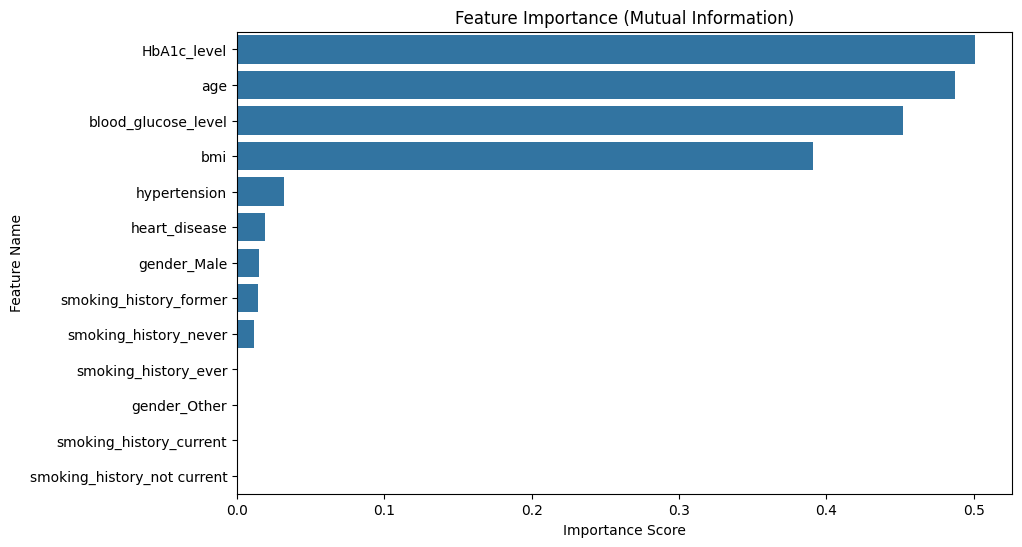

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Convert scores to a Pandas Series for easy viewing
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Feature Importance based on Mutual Information:\n", mi_scores_series)

# Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=mi_scores_series, y=mi_scores_series.index)
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


In [ ]:
# Selecting only the most important features
selected_features = ["HbA1c_level", "age", "blood_glucose_level", "bmi", "hypertension", "heart_disease"]
df_selected = df[selected_features + ["diabetes"]]

# Save the refined dataset
df_selected.to_csv("refined_dataset.csv", index=False)

print("Dataset refined successfully! Features selected:", df_selected.columns)


Dataset refined successfully! Features selected: Index(['HbA1c_level', 'age', 'blood_glucose_level', 'bmi', 'hypertension',
       'heart_disease', 'diabetes'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df_selected = pd.read_csv("refined_dataset.csv")

In [105]:
# Split into train and test sets
X = df_selected.drop(columns=["diabetes"])
y = df_selected["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9593299021091937
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18121
           1       0.86      0.63      0.72      1697

    accuracy                           0.96     19818
   macro avg       0.91      0.81      0.85     19818
weighted avg       0.96      0.96      0.96     19818



In [106]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='accuracy'
)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the best model
best_rf = rf_random.best_estimator_
best_rf.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


0.9714905641336159

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithms
}

# Create logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=log_reg, param_distributions=param_dist,
    n_iter=10, cv=5, verbose=2, n_jobs=-1, scoring='accuracy'
)

# Train on the dataset
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_log_reg = random_search.best_estimator_
accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_r

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1}
Test Accuracy: 0.9615501059642749


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on test data
y_pred_logistic = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)  # Use your best RandomForest model

# Print evaluation for Logistic Regression
print(" Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1-score:", f1_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

# Print evaluation for Random Forest
print("\n Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Logistic Regression Evaluation:
Accuracy: 0.9597840347159148
Precision: 0.8676470588235294
Recall: 0.6258102533883324
F1-score: 0.7271482369051695

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18121
           1       0.87      0.63      0.73      1697

    accuracy                           0.96     19818
   macro avg       0.92      0.81      0.85     19818
weighted avg       0.96      0.96      0.96     19818


 Random Forest Evaluation:
Accuracy: 0.9726006660611565
Precision: 0.998272884283247
Recall: 0.6812021213906895
F1-score: 0.8098073555166375

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18121
           1       1.00      0.68      0.81      1697

    accuracy                           0.97     19818
   macro avg       0.98      0.84      0.90     19818
weighted avg       0.97      0.97      0.97     19818



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


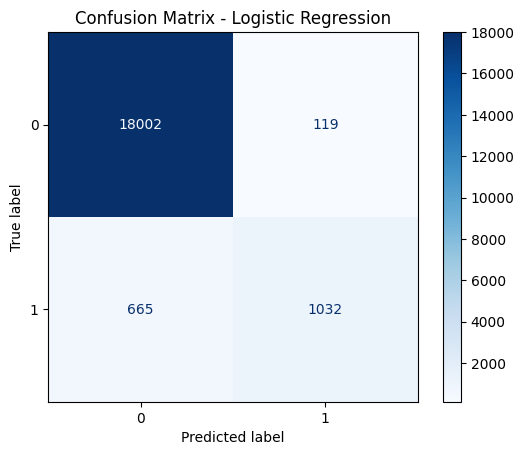

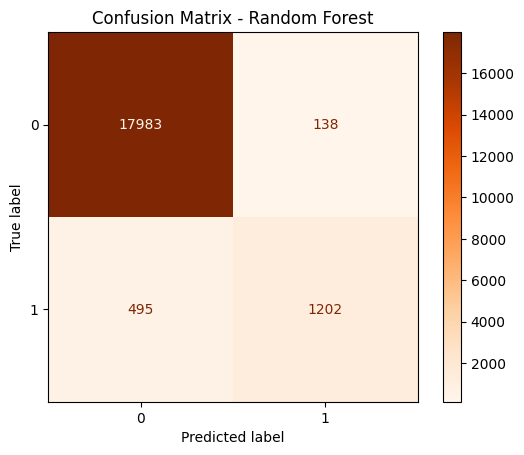

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_logistic = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


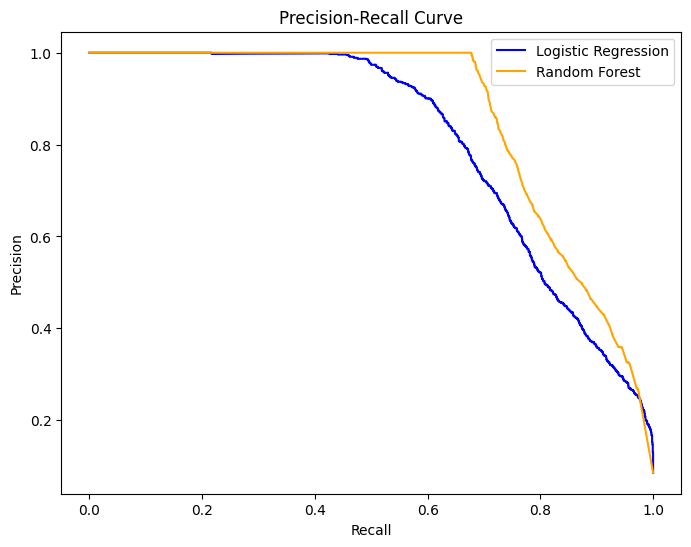

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get prediction probabilities for both models
y_scores_logistic = log_reg.predict_proba(X_test)[:, 1]
y_scores_rf = rf.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_scores_logistic)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall_logistic, precision_logistic, label="Logistic Regression", color="blue")
plt.plot(recall_rf, precision_rf, label="Random Forest", color="orange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
#Applying feature selection techniques
# Keep only selected features
selected_features = ['HbA1c_level', 'age', 'blood_glucose_level', 'bmi']
X_selected = X[selected_features]  # Update feature set

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model with best hyperparameters found earlier
logreg = LogisticRegression(solver='liblinear', penalty='l1', C=0.01)

# Train model
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Performance:
Accuracy: 0.9612473508931274
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18118
           1       0.91      0.61      0.73      1700

    accuracy                           0.96     19818
   macro avg       0.94      0.80      0.85     19818
weighted avg       0.96      0.96      0.96     19818

Confusion Matrix:
 [[18018   100]
 [  668  1032]]


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model with best hyperparameters found earlier
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_depth=10, bootstrap=False, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9714905641336159
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18118
           1       1.00      0.67      0.80      1700

    accuracy                           0.97     19818
   macro avg       0.98      0.83      0.89     19818
weighted avg       0.97      0.97      0.97     19818

Confusion Matrix:
 [[18118     0]
 [  565  1135]]


In [61]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get probabilities for class 1
y_probs = rf.predict_proba(X_test)[:, 1]

# Set a new decision threshold (adjust as needed)
new_threshold = 0.4  # Try values like 0.3, 0.4, 0.5, etc.

# Apply threshold
y_pred_adjusted = (y_probs >= new_threshold).astype(int)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print results
print(f"Adjusted Threshold: {new_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:\n", cm)


Adjusted Threshold: 0.4
Accuracy: 0.9711
Precision: 0.9812
Recall: 0.6759
F1-score: 0.8004
Confusion Matrix:
 [[18096    22]
 [  551  1149]]


In [65]:
import numpy as np

# Count class distribution
print("Non-Diabetic (0):", np.sum(y_train == 0))
print("Diabetic (1):", np.sum(y_train == 1))

Non-Diabetic (0): 72471
Diabetic (1): 6800


In [66]:
# Logistic Regression with class weights
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight="balanced", solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [107]:
# Define features and target
X = df[['HbA1c_level', 'age', 'blood_glucose_level', 'bmi']]  # Features
y = df['diabetes']  # Target variable (0 = No Diabetes, 1 = Diabetes)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [109]:
# Predictions
y_pred = rf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9630134221414876
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18118
           1       0.85      0.69      0.76      1700

    accuracy                           0.96     19818
   macro avg       0.91      0.84      0.87     19818
weighted avg       0.96      0.96      0.96     19818



In [110]:
test_case = pd.DataFrame([[7.8, 55, 180, 32]], columns=['HbA1c_level', 'age', 'blood_glucose_level', 'bmi'])
prediction = rf.predict(test_case)
print("Predicted Class:", prediction[0])  # 0 = No Diabetes, 1 = Diabetes

Predicted Class: 1


In [62]:
pip install joblib flask streamlit


In [77]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [78]:
from google.colab import files
files.download("random_forest_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>